In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings

warnings.filterwarnings('ignore')
sns.set(style='white')

df=pd.read_csv('C:/Users/juanj/Desktop/ThePower Business School/yellow_tripdata_2015-01.csv', nrows=100000)
print(df.shape)
df.head()

(100000, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [45]:
my_columns=['VendorID','passenger_count','tpep_pickup_datetime','tpep_dropoff_datetime','store_and_fwd_flag','pickup_longitude',
       'pickup_latitude','dropoff_longitude', 'dropoff_latitude']

In [46]:
df=df[my_columns]
df

,VendorID,passenger_count,tpep_pickup_datetime,tpep_dropoff_datetime,store_and_fwd_flag,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2,1,2015-01-15 19:05:39,2015-01-15 19:23:42,N,-73.993896,40.750111,-73.974785,40.750618
1,1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,N,-74.001648,40.724243,-73.994415,40.759109
2,1,1,2015-01-10 20:33:38,2015-01-10 20:43:41,N,-73.963341,40.802788,-73.951820,40.824413
3,1,1,2015-01-10 20:33:39,2015-01-10 20:35:31,N,-74.009087,40.713818,-74.004326,40.719986
4,1,1,2015-01-10 20:33:39,2015-01-10 20:52:58,N,-73.971176,40.762428,-74.004181,40.742653
...,...,...,...,...,...,...,...,...,...
99995,2,5,2015-01-21 18:16:49,2015-01-21 18:21:27,N,-73.986488,40.740021,-73.988098,40.732056
99996,2,1,2015-01-21 18:16:49,2015-01-21 19:11:10,N,-74.003777,40.731682,-73.783485,40.643738
99997,2,3,2015-01-21 18:16:49,2015-01-21 18:26:51,N,-74.007477,40.708118,-74.009270,40.718620
99998,2,5,2015-01-21 18:16:50,2015-01-21 19:28:34,N,-73.866737,40.770859,-73.977158,40.596611


In [47]:
df.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.516030,1.66818,-72.575004,39.979964,-72.617655,40.004596
std,0.499745,1.32375,10.078630,5.553303,9.925810,5.468119
min,1.000000,0.00000,-80.592438,0.000000,-74.393951,0.000000
25%,1.000000,1.00000,-73.991592,40.736145,-73.991150,40.734630
50%,2.000000,1.00000,-73.981461,40.753529,-73.979805,40.753777
75%,2.000000,2.00000,-73.966423,40.767785,-73.962532,40.768926
max,2.000000,9.00000,0.000000,41.105976,0.000000,41.220047


In [48]:
df['pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])
dates=['pickup_datetime','dropoff_datetime','tpep_pickup_datetime','tpep_dropoff_datetime']
df[dates]

,pickup_datetime,dropoff_datetime,tpep_pickup_datetime,tpep_dropoff_datetime
0,2015-01-15 19:05:39,2015-01-15 19:23:42,2015-01-15 19:05:39,2015-01-15 19:23:42
1,2015-01-10 20:33:38,2015-01-10 20:53:28,2015-01-10 20:33:38,2015-01-10 20:53:28
2,2015-01-10 20:33:38,2015-01-10 20:43:41,2015-01-10 20:33:38,2015-01-10 20:43:41
3,2015-01-10 20:33:39,2015-01-10 20:35:31,2015-01-10 20:33:39,2015-01-10 20:35:31
4,2015-01-10 20:33:39,2015-01-10 20:52:58,2015-01-10 20:33:39,2015-01-10 20:52:58
...,...,...,...,...
99995,2015-01-21 18:16:49,2015-01-21 18:21:27,2015-01-21 18:16:49,2015-01-21 18:21:27
99996,2015-01-21 18:16:49,2015-01-21 19:11:10,2015-01-21 18:16:49,2015-01-21 19:11:10
99997,2015-01-21 18:16:49,2015-01-21 18:26:51,2015-01-21 18:16:49,2015-01-21 18:26:51
99998,2015-01-21 18:16:50,2015-01-21 19:28:34,2015-01-21 18:16:50,2015-01-21 19:28:34


In [49]:
df[dates].dtypes

pickup_datetime          datetime64[ns]
dropoff_datetime         datetime64[ns]
tpep_pickup_datetime             object
tpep_dropoff_datetime            object
dtype: object

In [50]:
nom_num_cols=['pickup_datetime','dropoff_datetime','store_and_fwd_flag']
print(df[nom_num_cols].count())

pickup_datetime       100000
dropoff_datetime      100000
store_and_fwd_flag    100000
dtype: int64


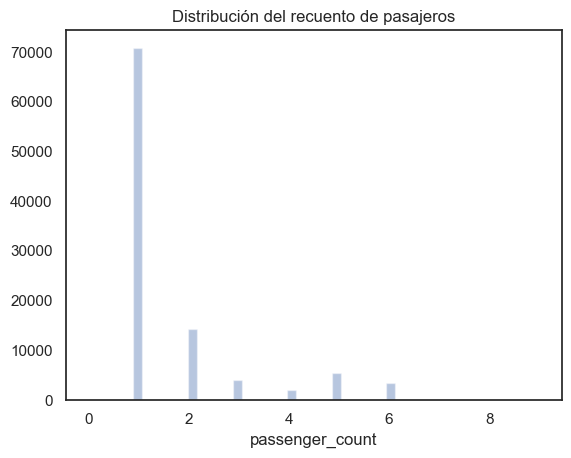

In [51]:
sns.distplot(df['passenger_count'], kde=False)
plt.title('Distribución del recuento de pasajeros')
plt.show()

In [52]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
print(df['pickup_day'].value_counts())
print(df['dropoff_day'].value_counts())

pickup_day
Saturday     18466
Thursday     16641
Friday       16603
Wednesday    14881
Tuesday      11884
Sunday       11211
Monday       10314
Name: count, dtype: int64
dropoff_day
Saturday     18366
Thursday     16616
Friday       16548
Wednesday    14795
Tuesday      11868
Sunday       11498
Monday       10309
Name: count, dtype: int64


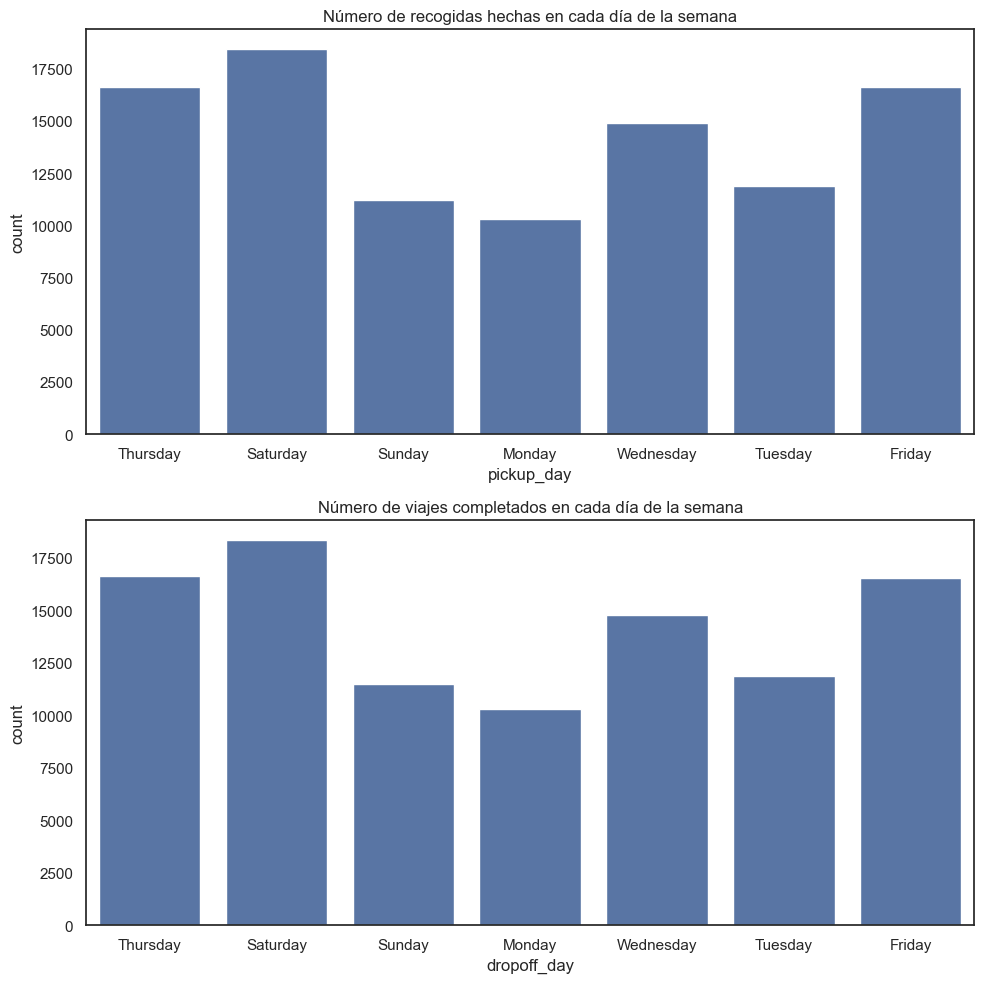

In [53]:
#Creamos una figura con la función subplots de matplotlib (plt) donde volcaremos dos gráficos, distribuidos en 2 filas y 1 columna, la figura tendrá un tamaño de 10x10.
figure,ax=plt.subplots(nrows=2,ncols=1, figsize=(10,10))
#Creamos un gráfico de barras con la función countplot de seaborn (sns), en el eje x volcamos los datos de la columna pickup_day, perteneciente al dataframe df, el gráfico estará posicionado en la primera fila [0] de la figura ax:
sns.countplot(x='pickup_day', data=df, ax=ax[0])
#Establecemos el título del primer subplot [0] de la figura ax:
ax[0].set_title('Número de recogidas hechas en cada día de la semana')
sns.countplot(x='dropoff_day', data=df, ax=ax[1])
ax[1].set_title('Número de viajes completados en cada día de la semana')
plt.tight_layout()

In [54]:
#Ahora queremos conocer la distribución de recogidas y llegadas a lo largo del día. Para ello debemos transformar las horas en intervalos de tiempo estandarizados (mañana, mediodía, tarde y noche). Creamos la función timezone para poder hacerlo:

def timezone(x):
  if x>=datetime.time(4,0,1) and x<=datetime.time(12,0,0):
    return 'Mañana'
  elif x>=datetime.time(12,0,1) and x<=datetime.time(16,0,0):
    return 'Mediodía'
  elif x>=datetime.time(16,0,1) and x<=datetime.time(21,0,0):
    return 'Tarde'
  elif x>=datetime.time(21,0,1) or x<=datetime.time(4,0,0):
    return 'Noche'

In [55]:
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x: timezone(datetime.datetime.strptime(str(x),"%Y-%m-%d %H:%M:%S").time())) #la función apply es necesaria para poder invocar la función creada Timezone y aplicarla a los datos temporales del campo pickup_datetime.
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x: timezone(datetime.datetime.strptime(str(x),"%Y-%m-%d %H:%M:%S").time()))

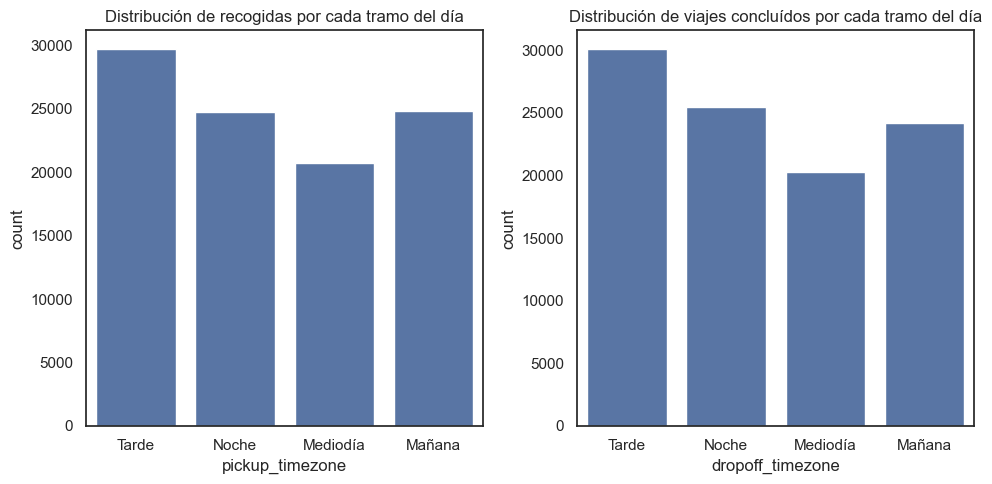

In [56]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x='pickup_timezone', data=df, ax=ax[0])
ax[0].set_title('Distribución de recogidas por cada tramo del día')
sns.countplot(x='dropoff_timezone', data=df,ax=ax[1])
ax[1].set_title('Distribución de viajes concluídos por cada tramo del día')
plt.tight_layout() 

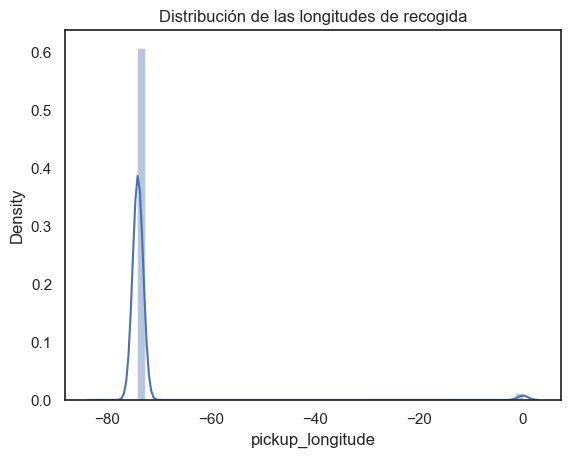

In [57]:
sns.distplot(df['pickup_longitude'])
plt.title('Distribución de las longitudes de recogida')
plt.show()

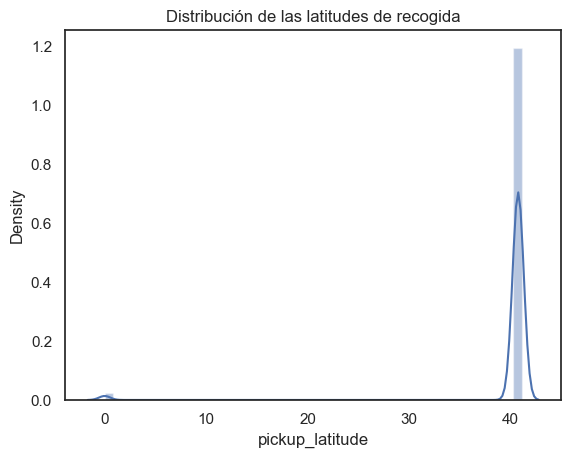

In [58]:
sns.distplot(df['pickup_latitude'])
plt.title('Distribución de las latitudes de recogida')
plt.show()

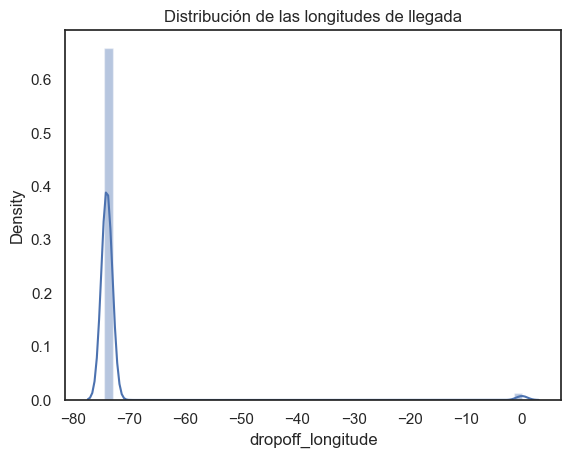

In [59]:
sns.distplot(df['dropoff_longitude'])
plt.title('Distribución de las longitudes de llegada')
plt.show()

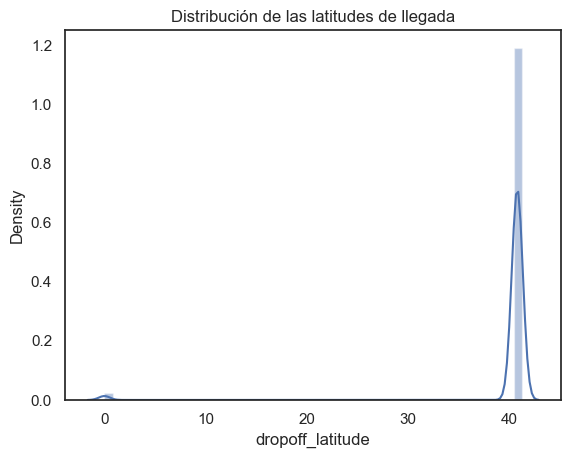

In [60]:
sns.distplot(df['dropoff_latitude'])
plt.title('Distribución de las latitudes de llegada')
plt.show()

In [61]:
print(df['store_and_fwd_flag'].value_counts())

store_and_fwd_flag
N    99082
Y      918
Name: count, dtype: int64


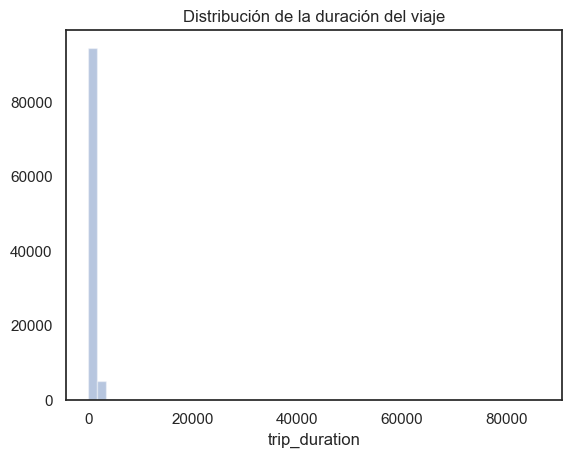

In [62]:
df['trip_duration']=(df['dropoff_datetime']-df['pickup_datetime']).dt.seconds
sns.distplot(df['trip_duration'], kde=False)
plt.title('Distribución de la duración del viaje')
plt.show()

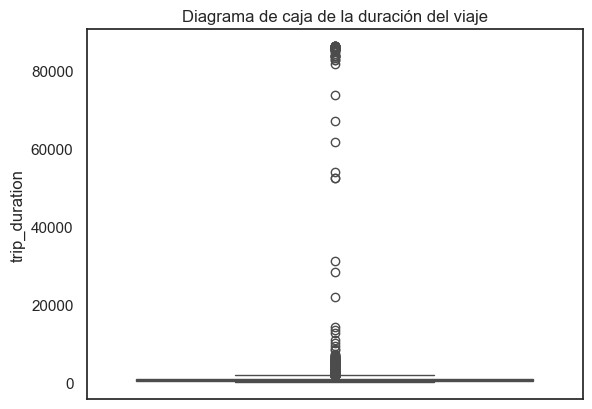

In [63]:
sns.boxplot(df['trip_duration'], orient='horizontal')
plt.title('Diagrama de caja de la duración del viaje')
plt.show()

In [64]:
df['trip_duration'].nlargest(10)

90249    86343
77138    86336
4012     86326
73004    86321
45933    86297
23156    86293
12347    86268
40903    86261
47541    86240
68395    86226
Name: trip_duration, dtype: int32

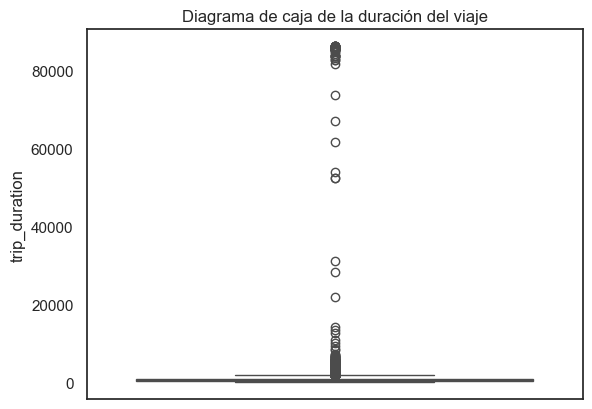

77138    86336.0
4012     86326.0
73004    86321.0
45933    86297.0
23156    86293.0
12347    86268.0
40903    86261.0
47541    86240.0
68395    86226.0
32024    86209.0
Name: trip_duration, dtype: float64


In [65]:
mediana=df.loc[df['trip_duration']<86343,'trip_duration'].median()
df.loc[df['trip_duration']>=86343]=np.nan
df.fillna(mediana,inplace=True)
sns.boxplot(df['trip_duration'], orient='horizontal')
plt.title('Diagrama de caja de la duración del viaje')
plt.show()
print(df['trip_duration'].nlargest(10))

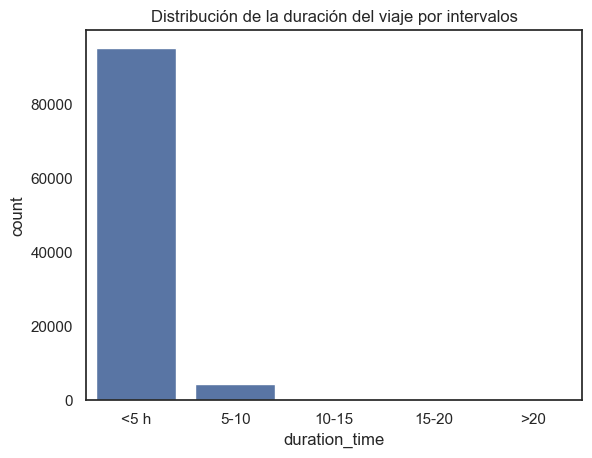

In [66]:
bins=np.array([0,1800,3600,5400,7200,90000])
df['duration_time']=pd.cut(df.trip_duration,bins,labels=["<5 h","5-10","10-15","15-20",">20"])
sns.countplot(x='duration_time', data=df)
plt.title('Distribución de la duración del viaje por intervalos')
plt.show()


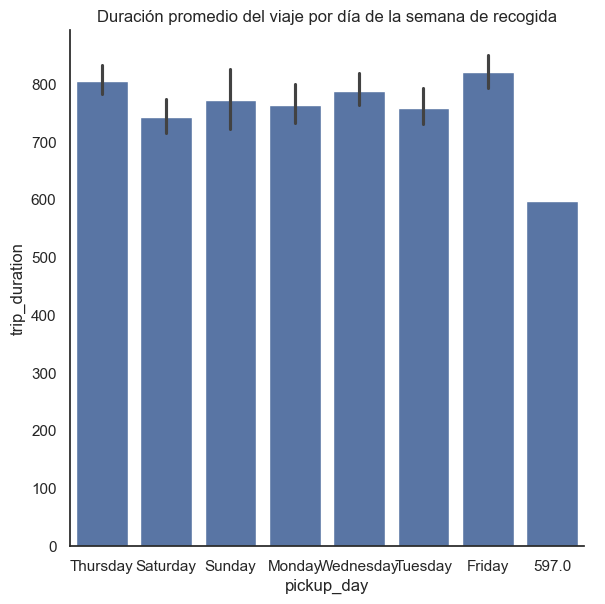

In [67]:
sns.catplot(x='pickup_day', y='trip_duration', kind='bar', data=df,height=6,aspect=1)
plt.title('Duración promedio del viaje por día de la semana de recogida')
plt.show()

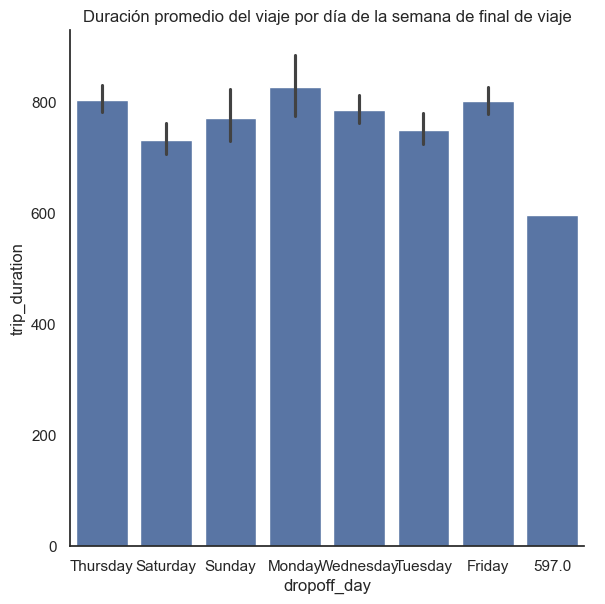

In [68]:
sns.catplot(x='dropoff_day', y='trip_duration', kind='bar', data=df,height=6,aspect=1)
plt.title('Duración promedio del viaje por día de la semana de final de viaje')
plt.show()

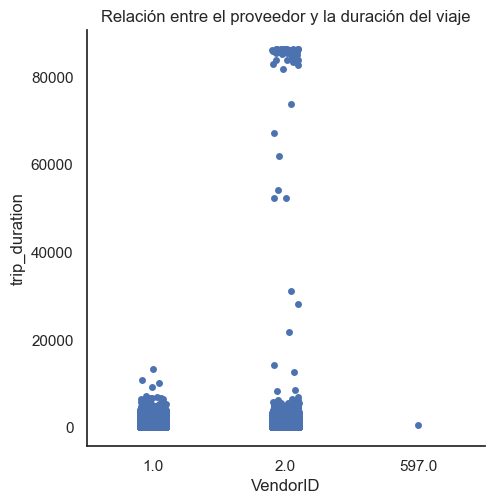

In [69]:
sns.catplot(x='VendorID', y='trip_duration', data=df, kind='strip')
plt.title('Relación entre el proveedor y la duración del viaje')
plt.show()

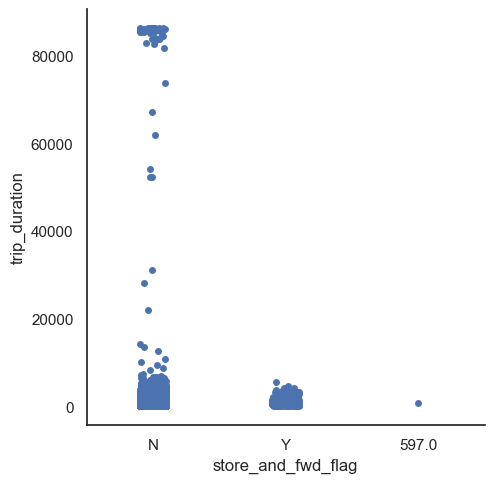

In [70]:
sns.catplot(x='store_and_fwd_flag',y='trip_duration',kind='strip',data=df)

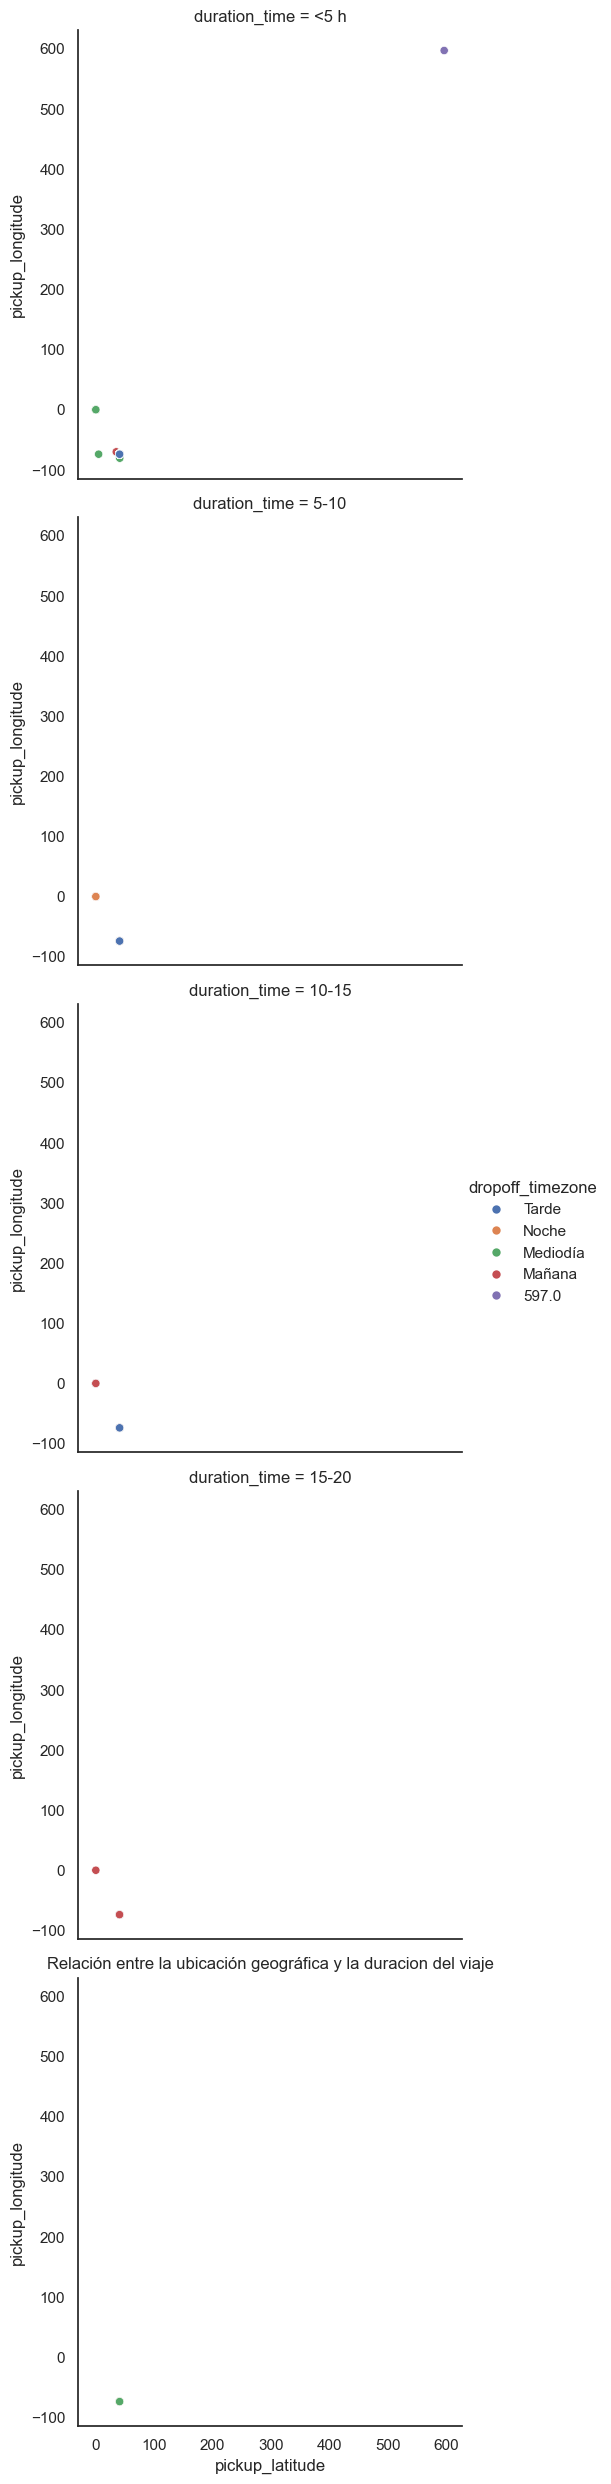

In [71]:
sns.relplot(x='pickup_latitude',y='pickup_longitude',hue='dropoff_timezone',row='duration_time',data=df)
plt.title('Relación entre la ubicación geográfica y la duracion del viaje')
plt.show()

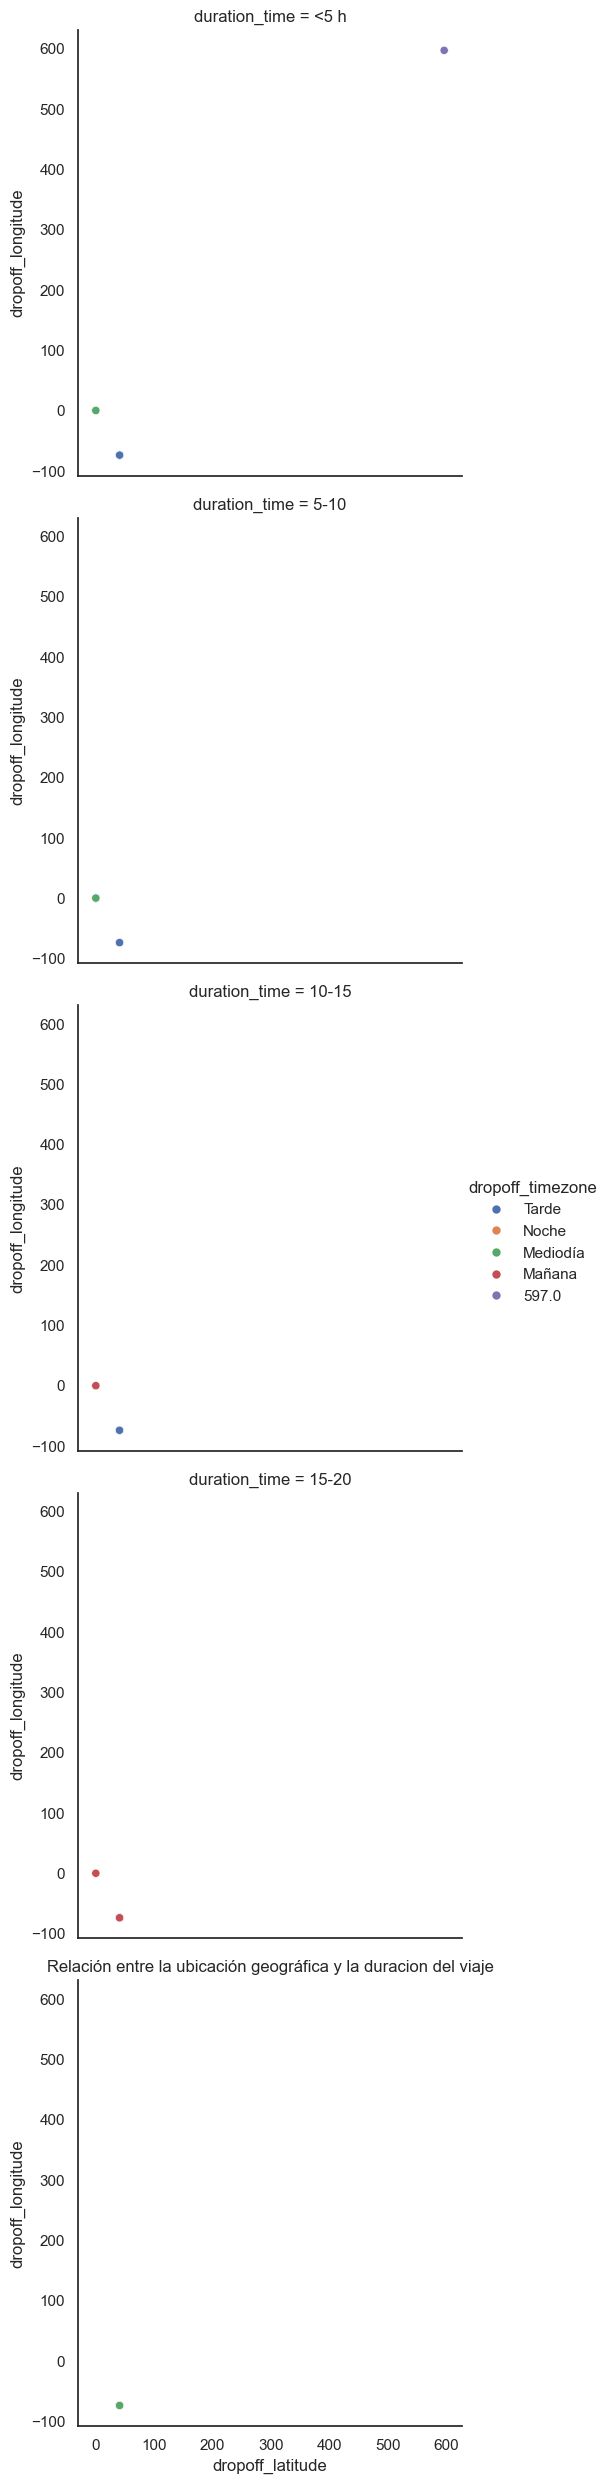

In [72]:
sns.relplot(x='dropoff_latitude',y='dropoff_longitude',hue='dropoff_timezone',row='duration_time',data=df)
plt.title('Relación entre la ubicación geográfica y la duracion del viaje')
plt.show()